# Analyses of multiple large populations

In [1]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [3]:
%%time

# SELECTION = 0.2 POPULAITONS
prefix = '../../Simulations/Ensemble-simulations/saved_simulations/large-selection_0p2-1000_MultiSim/'
selection_0p2 = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_0p2.append(data)
print(len(selection_0p2))
print(type(selection_0p2[0]))

100%|██████████| 1000/1000 [03:11<00:00,  5.23it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 55s, sys: 59.1 s, total: 2min 54s
Wall time: 3min 11s


## Maximum allele frequencies

In [4]:
%%time
selection_0p2_MaxAFs = get_max_AFs(selection_0p2, det_lim=100)

CPU times: user 3.82 s, sys: 11.2 s, total: 15.1 s
Wall time: 43.5 s


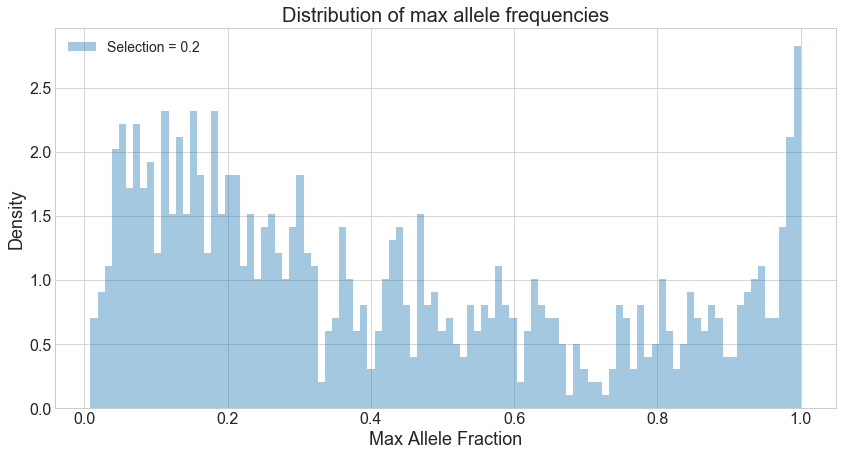

In [5]:
sns.distplot(selection_0p2_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 0.2");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p2-MaxAFs.png')
plt.show()

## Heterogeneity

In [6]:
%%time
selection_0p2_H = get_heterogeneity(selection_0p2, det_lim=100)

CPU times: user 4.09 s, sys: 8.01 s, total: 12.1 s
Wall time: 21.5 s


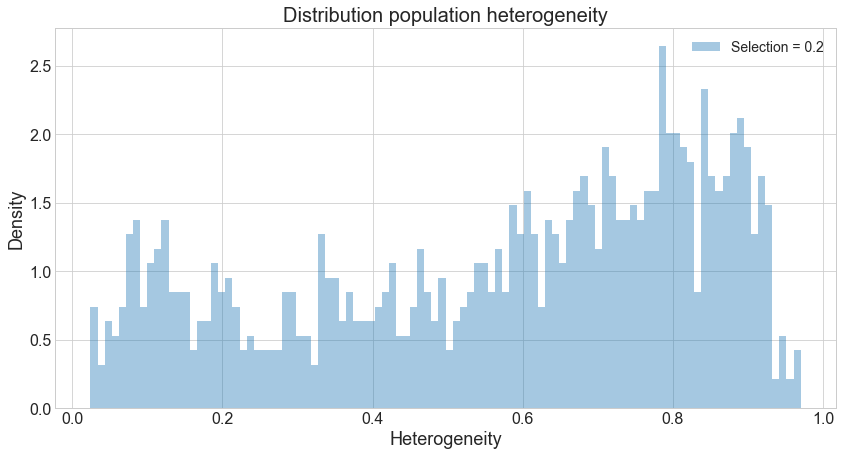

In [7]:
sns.distplot(selection_0p2_H, bins=100, norm_hist=True, kde=False, label="Selection = 0.2");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p2-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [8]:
%%time
selection_0p2_mut_distr = get_mutation_distributions(selection_0p2, det_lim=100)

CPU times: user 1min 3s, sys: 4.15 s, total: 1min 7s
Wall time: 1min 9s


In [9]:
selection_0p2_mut_distr.to_csv('../Analysis-Data/Large-1000_sim-selection_0p2_mut_distr.csv')

In [10]:
selection_0p2_avg_nmd = selection_0p2_mut_distr.mean()
selection_0p2_std_nmd = selection_0p2_mut_distr.std()

In [11]:
%%time
selection_0p2_avg_num_mut = avg_num_mutations(selection_0p2_avg_nmd)

CPU times: user 1.1 ms, sys: 467 µs, total: 1.57 ms
Wall time: 2.54 ms


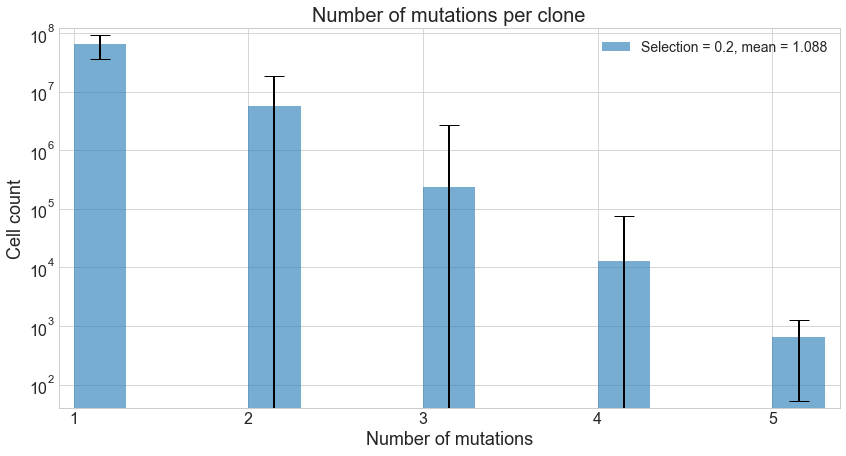

In [12]:
selection_0p2_errors = selection_0p2_std_nmd.values

plt.bar(left=selection_0p2_avg_nmd.index+0.15, height=selection_0p2_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=selection_0p2_errors, capsize=10, 
        label="Selection = 0.2, mean = %s" %(round(selection_0p2_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_0p2_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p2-Num_mutations.png')
plt.show()

## Total number of mutations

In [13]:
%%time
selection_0p2_total_m = get_total_mutations(selection_0p2, det_lim=1)

CPU times: user 12.5 s, sys: 39.6 s, total: 52.1 s
Wall time: 2min 8s


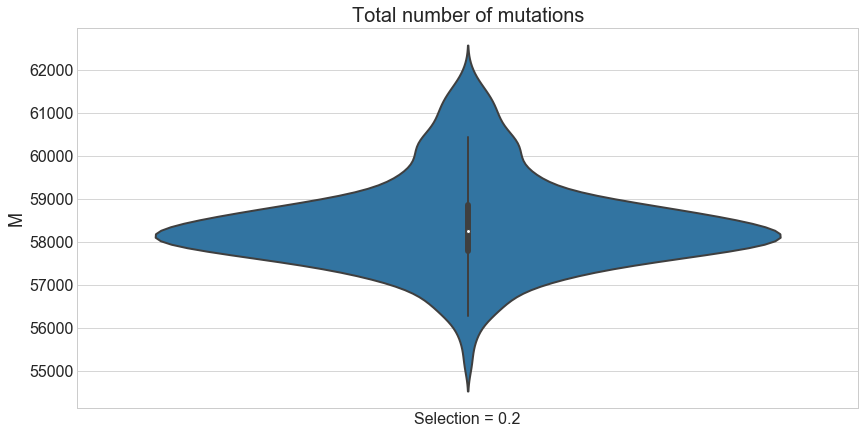

In [14]:
sns.violinplot(data=[selection_0p2_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 0.2"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p2-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [15]:
alpha = 0.3

In [16]:
%%time
selection_0p2_rec_errors = get_reconstruction_errors(selection_0p2, alpha, det_lim=100)

CPU times: user 2min 27s, sys: 12 s, total: 2min 39s
Wall time: 3min 3s


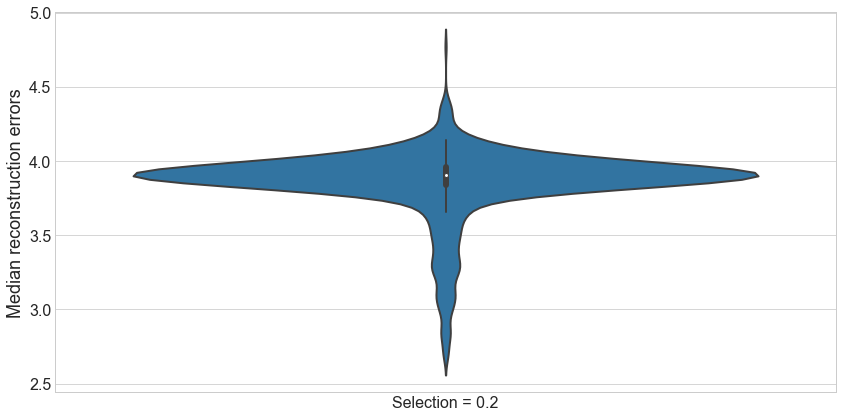

In [17]:
sns.violinplot(data=[selection_0p2_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 0.2"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p2-Rec_errors.png')
plt.show()

## Export data

In [18]:
d = pd.DataFrame()
d["selection_0p2_MaxAFs"] = selection_0p2_MaxAFs
d["selection_0p2_H"] = selection_0p2_H
d["selection_0p2_total_m"] = selection_0p2_total_m
d["selection_0p2_rec_errors"] = selection_0p2_rec_errors

d.to_csv('../Analysis-Data/Large-selection_0p2-1000_sim-Analyzed_data.csv')